##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Inspect and debug decision forest models

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/decision_forests/tutorials/advanced_colab"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/decision-forests/blob/main/documentation/tutorials/advanced_colab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/decision-forests/blob/main/documentation/tutorials/advanced_colab.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/decision-forests/documentation/tutorials/advanced_colab.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>


In this colab, you will learn how to inspect and create the structure of a model directly. We assume you are familiar with the concepts introduced in the
[beginner](beginner_colab.ipynb) and [intermediate](intermediate_colab.ipynb)
colabs.

In this colab, you will:

1.  Train a Random Forest model and access its structure programmatically.

1.  Create a Random Forest model by hand and use it as a classical model.

## Setup

In [2]:
# Install TensorFlow Dececision Forests.
!pip install tensorflow_decision_forests

# Use wurlitzer to show the training logs.
!pip install wurlitzer

  Using cached tensorflow_decision_forests-1.1.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.2 MB)


  Using cached wurlitzer-3.0.3-py3-none-any.whl (7.3 kB)


In [3]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import collections

2022-12-14 12:24:51.050867: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 12:24:51.050964: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 12:24:51.050973: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


The hidden code cell limits the output height in colab.

In [4]:
#@title

from IPython.core.magic import register_line_magic
from IPython.display import Javascript
from IPython.display import display as ipy_display

# Some of the model training logs can cover the full
# screen if not compressed to a smaller viewport.
# This magic allows setting a max height for a cell.
@register_line_magic
def set_cell_height(size):
  ipy_display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

## Train a simple Random Forest

We train a Random Forest like in the [beginner colab](beginner_colab.ipynb):

In [5]:
# Download the dataset
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv("/tmp/penguins.csv")

# Show the first three examples.
print(dataset_df.head(3))

# Convert the pandas dataframe into a tf dataset.
dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="species")

# Train the Random Forest
model = tfdf.keras.RandomForestModel(compute_oob_variable_importances=True)
model.fit(x=dataset_tf)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  


Use /tmpfs/tmp/tmpvr7urazn as temporary training directory


Reading training dataset...


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training dataset read in 0:00:02.961832. Found 344 examples.


Training model...


Model trained in 0:00:00.093680


Compiling model...


[INFO 2022-12-14T12:24:58.955519768+00:00 kernel.cc:1175] Loading model from path /tmpfs/tmp/tmpvr7urazn/model/ with prefix fb8057db01324481
[INFO 2022-12-14T12:24:58.971817533+00:00 abstract_model.cc:1306] Engine "RandomForestGeneric" built
[INFO 2022-12-14T12:24:58.97187255+00:00 kernel.cc:1021] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Model compiled.


Note the `compute_oob_variable_importances=True`
hyper-parameter in the model constructor. This option computes the Out-of-bag (OOB)
variable importance during training. This is a popular
[permutation variable importance](https://christophm.github.io/interpretable-ml-book/feature-importance.html) for Random Forest models.

Computing the OOB Variable importance does not impact the final model, it will slow the training on large datasets.

Check the model summary:

In [6]:
%set_cell_height 300

model.summary()

<IPython.core.display.Javascript object>

Model: "random_forest_model"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


Total params: 1


Trainable params: 0


Non-trainable params: 1


_________________________________________________________________


Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	bill_depth_mm
	bill_length_mm
	body_mass_g
	flipper_length_mm
	island
	sex
	year

No weights

Variable Importance: MEAN_DECREASE_IN_ACCURACY:
    1.    "bill_length_mm"  0.151163 ################
    2.            "island"  0.008721 #
    3.     "bill_depth_mm"  0.000000 
    4.       "body_mass_g"  0.000000 
    5.               "sex"  0.000000 
    6.              "year"  0.000000 
    7. "flipper_length_mm" -0.002907 

Variable Importance: MEAN_DECREASE_IN_AP_1_VS_OTHERS:
    1.    "bill_length_mm"  0.083305 ################
    2.            "island"  0.007664 #
    3. "flipper_length_mm"  0.003400 
    4.     "bill_depth_mm"  0.002741 
    5.       "body_mass_g"  0.000722 
    6.               "sex"  0.000644 
    7.              "year"  0.000000 

Variable Importance: MEAN_DECREASE_IN_AP_2_VS_OTHERS:
    1.    "bill_length_mm"  0.508510 ################
    2.            "island"  0.023487 
    3.  

Note the multiple variable importances with name `MEAN_DECREASE_IN_*`.

## Plotting the model

Next, plot the model.

A Random Forest is a large model (this model has 300 trees and ~5k nodes; see the summary above). Therefore, only plot the first tree, and limit the nodes to depth 3.

In [7]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

## Inspect the model structure

The model structure and meta-data is
available through the **inspector** created by `make_inspector()`.

**Note:** Depending on the learning algorithm and hyper-parameters, the
inspector will expose different specialized attributes. For examples, the
`winner_take_all` field is specific to Random Forest models.

In [8]:
inspector = model.make_inspector()

For our model, the available inspector fields are:

In [9]:
[field for field in dir(inspector) if not field.startswith("_")]

['MODEL_NAME',
 'dataspec',
 'evaluation',
 'export_to_tensorboard',
 'extract_all_trees',
 'extract_tree',
 'features',
 'header',
 'iterate_on_nodes',
 'label',
 'label_classes',
 'metadata',
 'model_type',
 'num_trees',
 'objective',
 'specialized_header',
 'task',
 'training_logs',
 'tuning_logs',
 'variable_importances',
 'winner_take_all_inference']

Remember to see [the API-reference](https://tensorflow.org/decision_forests/api_docs/python/tfdf/inspector/AbstractInspector) or use `?` for the builtin documentation.

In [10]:
?inspector.model_type

Some of the model meta-data:

In [11]:
print("Model type:", inspector.model_type())
print("Number of trees:", inspector.num_trees())
print("Objective:", inspector.objective())
print("Input features:", inspector.features())

Model type: RANDOM_FOREST
Number of trees: 300
Objective: Classification(label=__LABEL, class=None, num_classes=3)
Input features: ["bill_depth_mm" (1; #0), "bill_length_mm" (1; #1), "body_mass_g" (1; #2), "flipper_length_mm" (1; #3), "island" (4; #4), "sex" (4; #5), "year" (1; #6)]


`evaluate()` is the evaluation of the model computed during training. The dataset used for this evaluation depends on the algorithm. For example, it can be the validation dataset or the out-of-bag-dataset .

**Note:** While computed during training, `evaluate()` is never an evaluation on the
training dataset.

In [12]:
inspector.evaluation()

Evaluation(num_examples=344, accuracy=0.9767441860465116, loss=0.06782230959804512, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

The variable importances are:

In [13]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 MEAN_DECREASE_IN_AP_1_VS_OTHERS
	 MEAN_DECREASE_IN_PRAUC_3_VS_OTHERS
	 SUM_SCORE
	 MEAN_DECREASE_IN_PRAUC_1_VS_OTHERS
	 MEAN_DECREASE_IN_ACCURACY
	 MEAN_DECREASE_IN_AUC_1_VS_OTHERS
	 MEAN_DECREASE_IN_AP_3_VS_OTHERS
	 NUM_AS_ROOT
	 MEAN_DECREASE_IN_AP_2_VS_OTHERS
	 MEAN_DECREASE_IN_AUC_2_VS_OTHERS
	 MEAN_MIN_DEPTH
	 MEAN_DECREASE_IN_AUC_3_VS_OTHERS
	 NUM_NODES
	 MEAN_DECREASE_IN_PRAUC_2_VS_OTHERS


Different variable importances have different semantics. For example, a feature
with a **mean decrease in auc** of `0.05` means that removing this feature from
the training dataset would reduce/hurt the AUC by 5%.

In [14]:
# Mean decrease in AUC of the class 1 vs the others.
inspector.variable_importances()["MEAN_DECREASE_IN_AUC_1_VS_OTHERS"]

[("bill_length_mm" (1; #1), 0.0713061951754389),
 ("island" (4; #4), 0.007298519736842035),
 ("flipper_length_mm" (1; #3), 0.004505893640351366),
 ("bill_depth_mm" (1; #0), 0.0021244517543865804),
 ("body_mass_g" (1; #2), 0.0005482456140351033),
 ("sex" (4; #5), 0.00047971491228060437),
 ("year" (1; #6), 0.0)]

Plot the variable importances from the inspector using Matplotlib

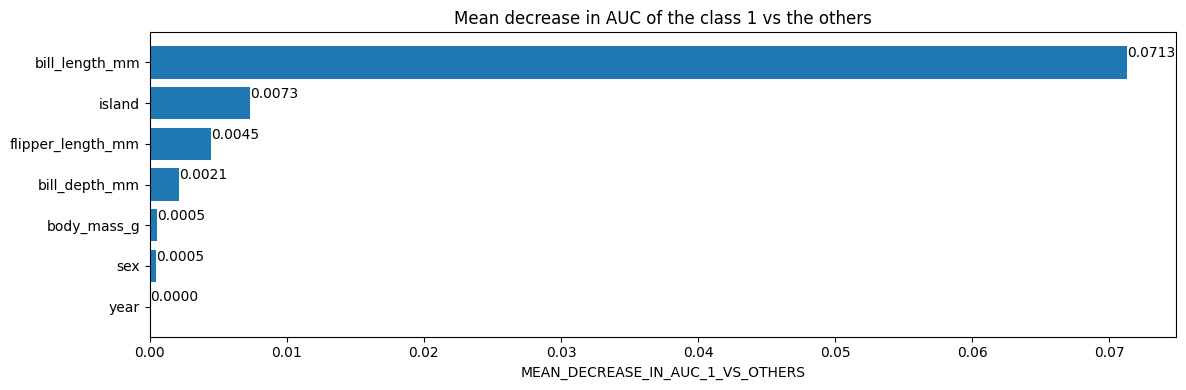

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "MEAN_DECREASE_IN_AUC_1_VS_OTHERS"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("Mean decrease in AUC of the class 1 vs the others")
plt.tight_layout()
plt.show()

Finally, access the actual tree structure:

In [16]:
inspector.extract_tree(tree_idx=0)

Tree(root=NonLeafNode(condition=(bill_length_mm >= 43.25; miss=True, score=0.5482327342033386), pos_child=NonLeafNode(condition=(island in ['Biscoe']; miss=True, score=0.6515106558799744), pos_child=NonLeafNode(condition=(bill_depth_mm >= 17.225584030151367; miss=False, score=0.027205035090446472), pos_child=LeafNode(value=ProbabilityValue([0.16666666666666666, 0.0, 0.8333333333333334],n=6.0), idx=7), neg_child=LeafNode(value=ProbabilityValue([0.0, 0.0, 1.0],n=104.0), idx=6), value=ProbabilityValue([0.00909090909090909, 0.0, 0.990909090909091],n=110.0)), neg_child=LeafNode(value=ProbabilityValue([0.0, 1.0, 0.0],n=61.0), idx=5), value=ProbabilityValue([0.005847953216374269, 0.3567251461988304, 0.6374269005847953],n=171.0)), neg_child=NonLeafNode(condition=(bill_depth_mm >= 15.100000381469727; miss=True, score=0.150658518075943), pos_child=NonLeafNode(condition=(flipper_length_mm >= 187.5; miss=True, score=0.036139510571956635), pos_child=LeafNode(value=ProbabilityValue([1.0, 0.0, 0.0],n

Extracting a tree is not efficient. If speed is important, the model inspection can be done with the `iterate_on_nodes()` method instead. This method is a Depth First Pre-order traversals iterator on all the nodes of the model.

**Note:** `extract_tree()` is implemented using `iterate_on_nodes()`.

For following example computes how many times each feature is used (this is a
kind of structural variable importance):

In [17]:
# number_of_use[F] will be the number of node using feature F in its condition.
number_of_use = collections.defaultdict(lambda: 0)

# Iterate over all the nodes in a Depth First Pre-order traversals.
for node_iter in inspector.iterate_on_nodes():

  if not isinstance(node_iter.node, tfdf.py_tree.node.NonLeafNode):
    # Skip the leaf nodes
    continue

  # Iterate over all the features used in the condition.
  # By default, models are "oblique" i.e. each node tests a single feature.
  for feature in node_iter.node.condition.features():
    number_of_use[feature] += 1

print("Number of condition nodes per features:")
for feature, count in number_of_use.items():
  print("\t", feature.name, ":", count)

Number of condition nodes per features:
	 bill_length_mm : 778
	 bill_depth_mm : 463
	 flipper_length_mm : 414
	 island : 342
	 body_mass_g : 338
	 year : 19
	 sex : 36


## Creating a model by hand

In this section you will create a small Random Forest model by hand. To make it
extra easy, the model will only contain one simple tree:

```
3 label classes: Red, blue and green.
2 features: f1 (numerical) and f2 (string categorical)

f1>=1.5
    ├─(pos)─ f2 in ["cat","dog"]
    │         ├─(pos)─ value: [0.8, 0.1, 0.1]
    │         └─(neg)─ value: [0.1, 0.8, 0.1]
    └─(neg)─ value: [0.1, 0.1, 0.8]
```

In [18]:
# Create the model builder
builder = tfdf.builder.RandomForestBuilder(
    path="/tmp/manual_model",
    objective=tfdf.py_tree.objective.ClassificationObjective(
        label="color", classes=["red", "blue", "green"]))

Each tree is added one by one.

**Note:** The tree object (`tfdf.py_tree.tree.Tree`) is the same as the one returned by `extract_tree()` in the previous section.

In [19]:
# So alias
Tree = tfdf.py_tree.tree.Tree
SimpleColumnSpec = tfdf.py_tree.dataspec.SimpleColumnSpec
ColumnType = tfdf.py_tree.dataspec.ColumnType
# Nodes
NonLeafNode = tfdf.py_tree.node.NonLeafNode
LeafNode = tfdf.py_tree.node.LeafNode
# Conditions
NumericalHigherThanCondition = tfdf.py_tree.condition.NumericalHigherThanCondition
CategoricalIsInCondition = tfdf.py_tree.condition.CategoricalIsInCondition
# Leaf values
ProbabilityValue = tfdf.py_tree.value.ProbabilityValue

builder.add_tree(
    Tree(
        NonLeafNode(
            condition=NumericalHigherThanCondition(
                feature=SimpleColumnSpec(name="f1", type=ColumnType.NUMERICAL),
                threshold=1.5,
                missing_evaluation=False),
            pos_child=NonLeafNode(
                condition=CategoricalIsInCondition(
                    feature=SimpleColumnSpec(name="f2",type=ColumnType.CATEGORICAL),
                    mask=["cat", "dog"],
                    missing_evaluation=False),
                pos_child=LeafNode(value=ProbabilityValue(probability=[0.8, 0.1, 0.1], num_examples=10)),
                neg_child=LeafNode(value=ProbabilityValue(probability=[0.1, 0.8, 0.1], num_examples=20))),
            neg_child=LeafNode(value=ProbabilityValue(probability=[0.1, 0.1, 0.8], num_examples=30)))))

Conclude the tree writing

In [20]:
builder.close()

[INFO 2022-12-14T12:25:00.790486355+00:00 kernel.cc:1175] Loading model from path /tmp/manual_model/tmp/ with prefix e09a067144bc479b
[INFO 2022-12-14T12:25:00.790802259+00:00 decision_forest.cc:640] Model loaded with 1 root(s), 5 node(s), and 2 input feature(s).
[INFO 2022-12-14T12:25:00.790878962+00:00 kernel.cc:1021] Use fast generic engine


INFO:tensorflow:Assets written to: /tmp/manual_model/assets


INFO:tensorflow:Assets written to: /tmp/manual_model/assets


Now you can open the model as a regular keras model, and make predictions:

In [21]:
manual_model = tf.keras.models.load_model("/tmp/manual_model")

[INFO 2022-12-14T12:25:01.436506097+00:00 kernel.cc:1175] Loading model from path /tmp/manual_model/assets/ with prefix e09a067144bc479b
[INFO 2022-12-14T12:25:01.436871761+00:00 decision_forest.cc:640] Model loaded with 1 root(s), 5 node(s), and 2 input feature(s).
[INFO 2022-12-14T12:25:01.436909696+00:00 kernel.cc:1021] Use fast generic engine


In [22]:
examples = tf.data.Dataset.from_tensor_slices({
        "f1": [1.0, 2.0, 3.0],
        "f2": ["cat", "cat", "bird"]
    }).batch(2)

predictions = manual_model.predict(examples)

print("predictions:\n",predictions)

1/2 [==============>...............] - ETA: 0s

2/2 [==============================] - 0s 2ms/step


predictions:
 [[0.1 0.1 0.8]
 [0.8 0.1 0.1]
 [0.1 0.8 0.1]]


Access the structure:

**Note:** Because the model is serialized-and-deserialized, you need to use an alternative but equivalent form.

In [23]:
yggdrasil_model_path = manual_model.yggdrasil_model_path_tensor().numpy().decode("utf-8")
print("yggdrasil_model_path:",yggdrasil_model_path)

inspector = tfdf.inspector.make_inspector(yggdrasil_model_path)
print("Input features:", inspector.features())

yggdrasil_model_path: /tmp/manual_model/assets/
Input features: ["f1" (1; #1), "f2" (4; #2)]


And of course, you can plot this manually constructed model:

In [24]:
tfdf.model_plotter.plot_model_in_colab(manual_model)